In [ ]:
#### 라이브러리 불러오기 ####

## 파일 처리 과정을 위한 라이브러리들 ##
import pandas as pd
import numpy as np

## 시각화 위한 라이브러리들 ##
import matplotlib.pyplot as plt
import seaborn as sns

## 머신 러닝 학습 위한 라이브러리들 ##
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier, plot_tree

## 딥러닝 학습 위한 라이브러리들 ##
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

print("Done importing library!")  #라이브러리 불러오기 완료 메시지

Done importing library!


In [ ]:
#### 데이터 불러오기 ####

data_frame = pd.read_csv("diabetes.csv")  #csv 파일 불러와서 data_frame 변수 안에 넣기
data_frame  #data_frame 변수 출력해서 제대로 불러와 졌는지 확인

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
data_frame.isnull().sum() #결측치 갯수 확인하기

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
#### 이상치 제거하기 ####
data_frame_ = data_frame[(data_frame['Glucose'] != 0)]
data_frame__ = data_frame_[(data_frame_['BloodPressure'] != 0)]
data_frame___ = data_frame__[(data_frame__['SkinThickness'] != 0)]
data_frame____ = data_frame___[(data_frame___['Insulin'] != 0)]
data_frame_____ = data_frame____[(data_frame____['BMI'] != 0)]

In [ ]:
data_frame = data_frame_____  #이상치 제거한 결과를 원래 데이터 들어있던 변수에 넣기
data_frame  #이상치 제거 되었는지 확인하기

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
13,1,189,60,23,846,30.1,0.398,59,1
...,...,...,...,...,...,...,...,...,...
753,0,181,88,44,510,43.3,0.222,26,1
755,1,128,88,39,110,36.5,1.057,37,1
760,2,88,58,26,16,28.4,0.766,22,0
763,10,101,76,48,180,32.9,0.171,63,0


<BarContainer object of 2 artists>

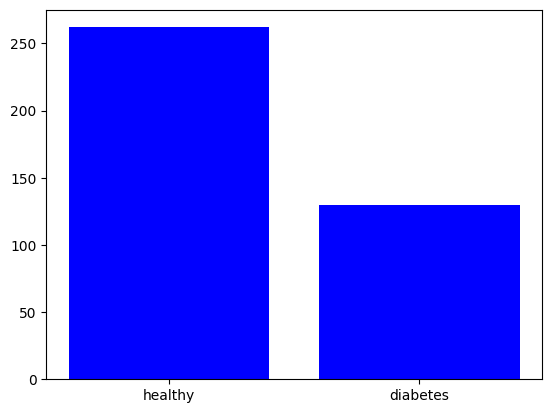

In [ ]:
#### 데이터에서 건강한 상태와 당뇨인 상태의 갯수 확인하기 ####

data = data_frame["Outcome"].value_counts() #당뇨 O/X 갯수 세서 저장

## x, y축에 들어갈 데이터들 저장
x = ["healthy", "diabetes"]
y = data.values

plt.bar(x,y,color="blue") #막대 그래프 그리기

In [ ]:
#### 당뇨 맞는것과 아닌거 데이터 각 변수에 넣기 ####
yes_diabetes = data_frame[data_frame["Outcome"] == 1]
no_diabetes = data_frame[data_frame["Outcome"] == 0]

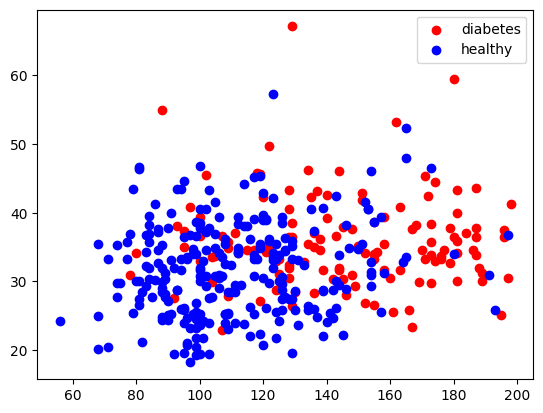

In [ ]:
#### 혈당량과 BMI 사이의 상관관계 산포도 그리기 ####

x1,y1 = yes_diabetes["Glucose"], yes_diabetes["BMI"]  #당뇨병 O 데이터에서 혈당량과 BMI 값을 x,y축 값 변수에 저장
x2,y2 = no_diabetes["Glucose"], no_diabetes["BMI"]  #당뇨병 X 데이터에서 혈당량과 BMI 값을 x,y축 값 변수에 저장

## 산점도 그리기 ##
plt.scatter(x1, y1, color="red", label="diabetes")
plt.scatter(x2, y2, color="blue", label="healthy")
plt.legend()
plt.show()

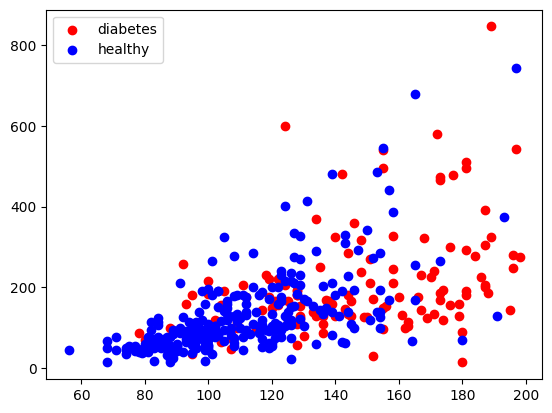

In [ ]:
#### 혈당량과 인슐린 농도 사이의 상관관계 산포도 그리기 ####

x1,y1 = yes_diabetes["Glucose"], yes_diabetes["Insulin"]  #당뇨병 O 데이터에서 혈당량과 인슐린 값을 x,y축 값 변수에 저장
x2,y2 = no_diabetes["Glucose"], no_diabetes["Insulin"]  #당뇨병 X 데이터에서 혈당량과 인슐린 값을 x,y축 값 변수에 저장

## 산점도 그리기 ##
plt.scatter(x1, y1, color="red", label="diabetes")
plt.scatter(x2, y2, color="blue", label="healthy")
plt.legend()
plt.show()

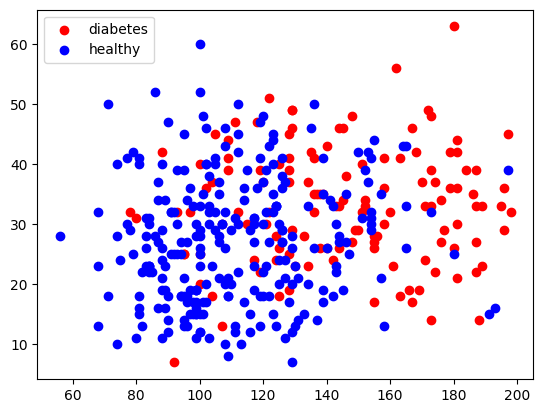

In [ ]:
#### 혈당량과 피부 두께 사이의 상관관계 산포도 그리기 ####

x1,y1 = yes_diabetes["Glucose"], yes_diabetes["SkinThickness"]  #당뇨병 O 데이터에서 혈당량과 피부 두께 값을 x,y축 값 변수에 저장
x2,y2 = no_diabetes["Glucose"], no_diabetes["SkinThickness"]  #당뇨병 X 데이터에서 혈당량과 피부 두께 값을 x,y축 값 변수에 저장

## 산점도 그리기 ##
plt.scatter(x1, y1, color="red", label="diabetes")
plt.scatter(x2, y2, color="blue", label="healthy")
plt.legend()
plt.show()

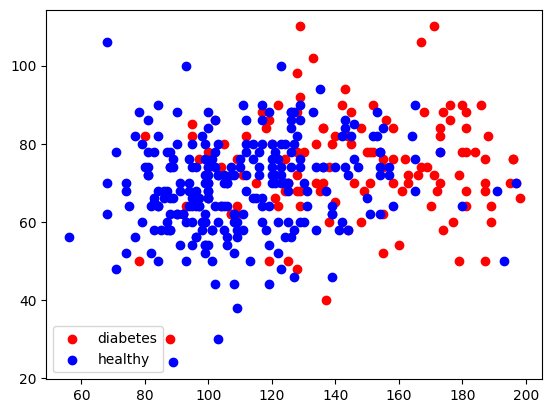

In [ ]:
#### 혈당량과 혈압 사이의 상관관계 산포도 그리기 ####

x1,y1 = yes_diabetes["Glucose"], yes_diabetes["BloodPressure"]  #당뇨병 O 데이터에서 혈당량과 혈압 값을 x,y축 값 변수에 저장
x2,y2 = no_diabetes["Glucose"], no_diabetes["BloodPressure"]  #당뇨병 X 데이터에서 혈당량과 혈압 값을 x,y축 값 변수에 저장

## 산점도 그리기 ##
plt.scatter(x1, y1, color="red", label="diabetes")
plt.scatter(x2, y2, color="blue", label="healthy")
plt.legend()
plt.show()

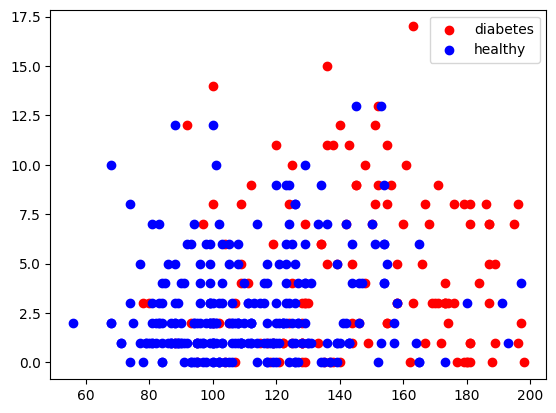

In [ ]:
#### 혈당량과 임신 횟수 사이의 상관관계 산포도 그리기 ####

x1,y1 = yes_diabetes["Glucose"], yes_diabetes["Pregnancies"]  #당뇨병 O 데이터에서 혈당량과 임신 횟수 값을 x,y축 값 변수에 저장
x2,y2 = no_diabetes["Glucose"], no_diabetes["Pregnancies"]  #당뇨병 X 데이터에서 혈당량과 임신 횟수 값을 x,y축 값 변수에 저장

## 산점도 그리기 ##
plt.scatter(x1, y1, color="red", label="diabetes")
plt.scatter(x2, y2, color="blue", label="healthy")
plt.legend()
plt.show()

In [ ]:
X = data_frame.drop("Outcome", axis=1)  #당뇨병 유무가 아닌 값들 저장
y = data_frame["Outcome"] #당뇨병 유무 저장

X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
6,3,78,50,32,88,31.0,0.248,26
8,2,197,70,45,543,30.5,0.158,53
13,1,189,60,23,846,30.1,0.398,59
...,...,...,...,...,...,...,...,...
753,0,181,88,44,510,43.3,0.222,26
755,1,128,88,39,110,36.5,1.057,37
760,2,88,58,26,16,28.4,0.766,22
763,10,101,76,48,180,32.9,0.171,63


In [ ]:
y

,Outcome
3,0
4,1
6,1
8,1
13,1
...,...
753,1
755,1
760,0
763,0


정확도: 0.7551020408163265
              precision    recall  f1-score   support

           0       0.80      0.85      0.82        66
           1       0.64      0.56      0.60        32

    accuracy                           0.76        98
   macro avg       0.72      0.71      0.71        98
weighted avg       0.75      0.76      0.75        98



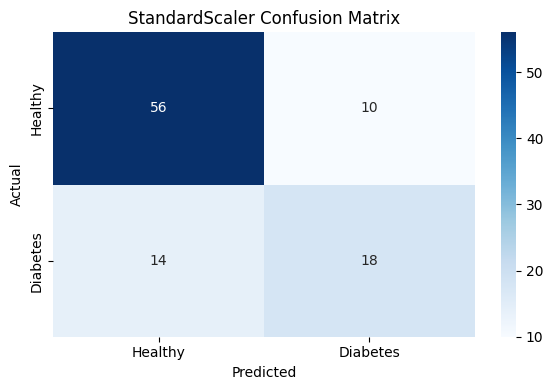

In [ ]:
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)  #학습용 데이터와 테스트용 데이터 나누기




#### standard scaler로 정규화 하고 로지스틱 회기를 이용해 학습시키기 ####

## standard scaler로 정규화 ##
scaler_standard = StandardScaler()
X_train_standard = scaler_standard.fit_transform(X_train_raw)
X_test_standard = scaler_standard.transform(X_test_raw)

## 로지스틱 회기 모델로 학습 ##
model_standard = LogisticRegression()
model_standard.fit(X_train_standard, y_train)

## 모델로 예측 하기 ##
y_pred_standard = model_standard.predict(X_test_standard)

## 결과 출력 ##
print("정확도:", accuracy_score(y_test, y_pred_standard))
print(classification_report(y_test, y_pred_standard))

## 혼동 행렬 그려 시각화 하기 ##
conf_matrix_standard = confusion_matrix(y_test, y_pred_standard)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_standard, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Healthy", "Diabetes"],
            yticklabels=["Healthy", "Diabetes"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("StandardScaler Confusion Matrix")
plt.tight_layout()
plt.show()

정확도: 0.7653061224489796
              precision    recall  f1-score   support

           0       0.79      0.88      0.83        66
           1       0.68      0.53      0.60        32

    accuracy                           0.77        98
   macro avg       0.74      0.71      0.72        98
weighted avg       0.76      0.77      0.76        98



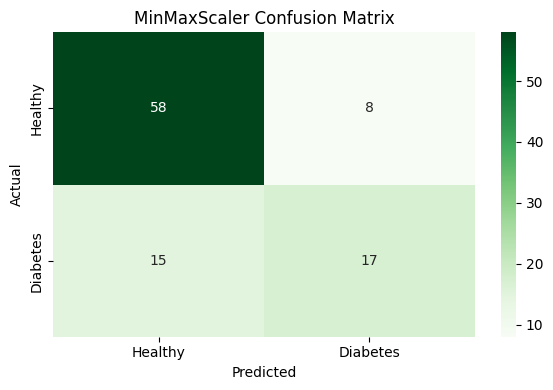

In [ ]:
#### minmax scaler로 정규화 하고 로지스틱 회기를 이용해 학습시키기 ####

## minmax scaler로 정규화 ##
scaler_minmax = MinMaxScaler()
X_train_minmax = scaler_minmax.fit_transform(X_train_raw)
X_test_minmax = scaler_minmax.transform(X_test_raw)

## 로지스틱 회기 모델로 학습 ##
model_minmax = LogisticRegression()
model_minmax.fit(X_train_minmax, y_train)

## 모델로 예측 하기 ##
y_pred_minmax = model_minmax.predict(X_test_minmax)

## 결과 출력 ##
print("정확도:", accuracy_score(y_test, y_pred_minmax))
print(classification_report(y_test, y_pred_minmax))

## 혼동 행렬 그려 시각화 하기 ##
conf_matrix_minmax = confusion_matrix(y_test, y_pred_minmax)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_minmax, annot=True, fmt="d", cmap="Greens",
            xticklabels=["Healthy", "Diabetes"],
            yticklabels=["Healthy", "Diabetes"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("MinMaxScaler Confusion Matrix")
plt.tight_layout()
plt.show()

정확도: 0.7244897959183674
              precision    recall  f1-score   support

           0       0.77      0.85      0.81        66
           1       0.60      0.47      0.53        32

    accuracy                           0.72        98
   macro avg       0.68      0.66      0.67        98
weighted avg       0.71      0.72      0.71        98



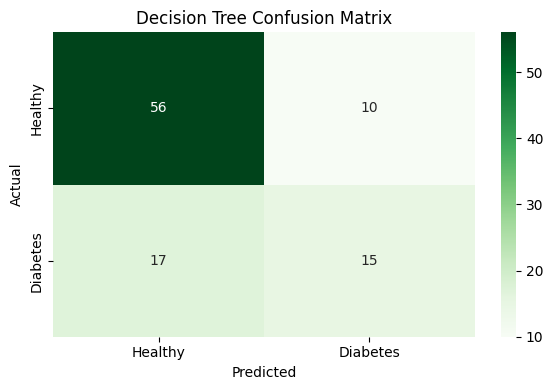

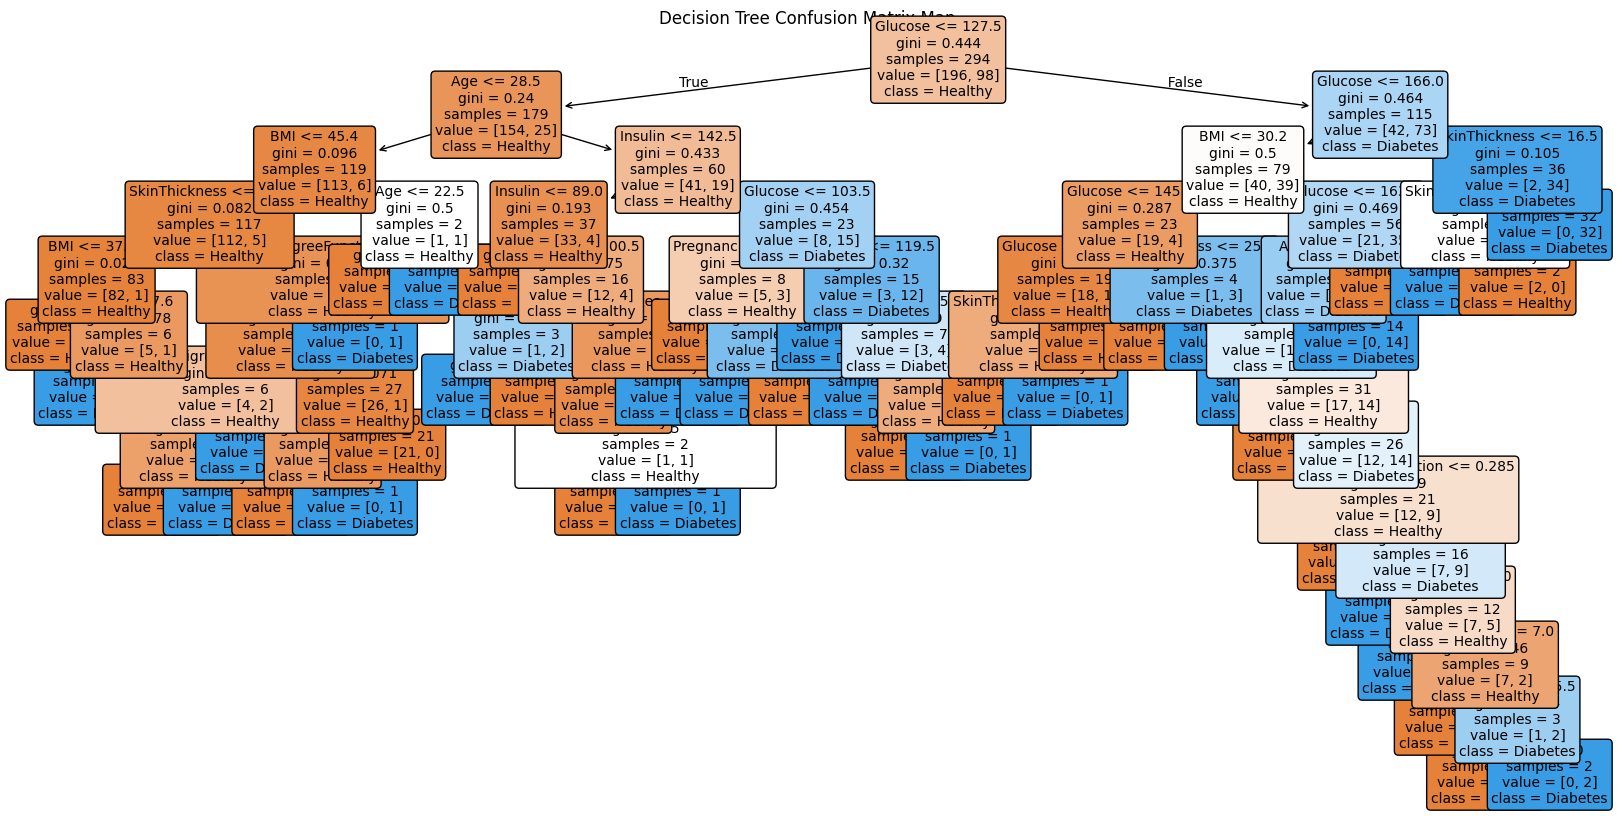

In [ ]:
#### 디시전 트리로 학습시키기(깊이 제한 없음) ####

## 디시전 트리 모델로 학습 ##
model_tree = DecisionTreeClassifier(random_state=42)
model_tree.fit(X_train_raw, y_train)

## 모델로 예측하기 ##
y_pred_tree = model_tree.predict(X_test_raw)

## 결과 출력 ##
print("정확도:", accuracy_score(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))

## 혼동 행렬 그려 시각화 하기 ##
conf_matrix_tree = confusion_matrix(y_test, y_pred_tree)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_tree, annot=True, fmt="d", cmap="Greens",
            xticklabels=["Healthy", "Diabetes"],
            yticklabels=["Healthy", "Diabetes"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Decision Tree Confusion Matrix")
plt.tight_layout()
plt.show()

## 트리 구조 그려 시각화 하기 ##
plt.figure(figsize=(20, 10))
plot_tree(model_tree,
          feature_names=X.columns,
          class_names=["Healthy", "Diabetes"],
          filled=True,
          rounded=True,
          fontsize=10)
plt.title("Decision Tree Confusion Matrix Map")
plt.show()

정확도: 0.7551020408163265
              precision    recall  f1-score   support

           0       0.85      0.77      0.81        66
           1       0.61      0.72      0.66        32

    accuracy                           0.76        98
   macro avg       0.73      0.75      0.73        98
weighted avg       0.77      0.76      0.76        98



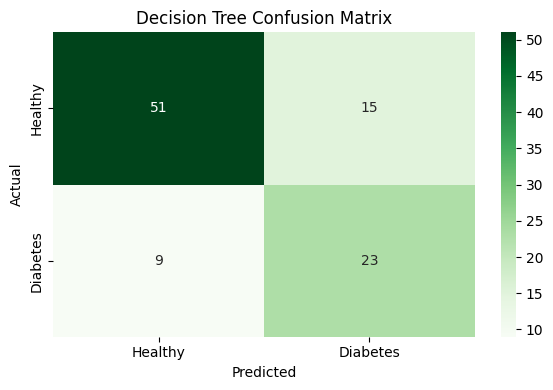

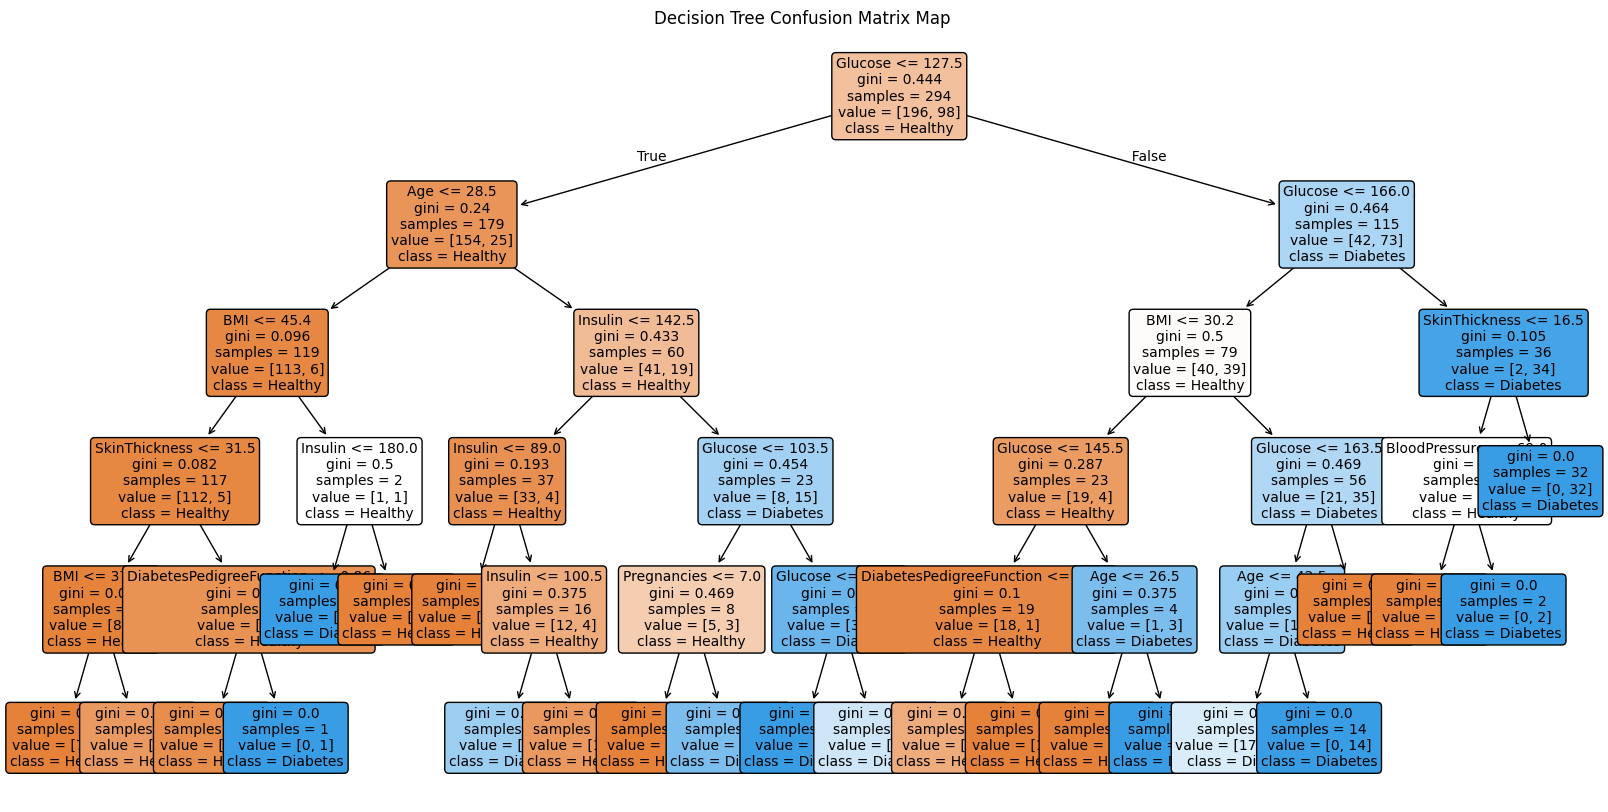

In [ ]:
#### 디시전 트리로 학습시키기(깊이 제한 있음) ####

## 디시전 트리 모델로 학습(깊이 제한 5) ##
model_tree = DecisionTreeClassifier(random_state=42, max_depth=5)
model_tree.fit(X_train_raw, y_train)

## 모델로 예측하기 ##
y_pred_tree = model_tree.predict(X_test_raw)

## 결과 출력 ##
print("정확도:", accuracy_score(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))

## 혼동 행렬 그려 시각화 하기 ##
conf_matrix_tree = confusion_matrix(y_test, y_pred_tree)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_tree, annot=True, fmt="d", cmap="Greens",
            xticklabels=["Healthy", "Diabetes"],
            yticklabels=["Healthy", "Diabetes"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Decision Tree Confusion Matrix")
plt.tight_layout()
plt.show()

## 트리 구조 그려 시각화 하기 ##
plt.figure(figsize=(20, 10))
plot_tree(model_tree,
          feature_names=X.columns,
          class_names=["Healthy", "Diabetes"],
          filled=True,
          rounded=True,
          fontsize=10)
plt.title("Decision Tree Confusion Matrix Map")
plt.show()

Epoch 1/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.6487 - loss: 0.6875 - learning_rate: 0.0010
Epoch 2/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6671 - loss: 0.6730 - learning_rate: 0.0010
Epoch 3/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6586 - loss: 0.6609 - learning_rate: 0.0010
Epoch 4/500
 6/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6468 - loss: 0.6512

/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)
/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/callback_list.py:145: UserWarning: Learning rate reduction is conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss,learning_rate.
  callback.on_epoch_end(epoch, logs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6573 - loss: 0.6477 - learning_rate: 0.0010
Epoch 5/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6767 - loss: 0.6285 - learning_rate: 0.0010
Epoch 6/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6574 - loss: 0.6281 - learning_rate: 0.0010
Epoch 7/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6482 - loss: 0.6105 - learning_rate: 0.0010
Epoch 8/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6704 - loss: 0.5832 - learning_rate: 0.0010
Epoch 9/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7173 - loss: 0.5653 - learning_rate: 0.0010
Epoch 10/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7622 - loss: 0.5262 - learning_rate: 0.0010
Epoch 11/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7241 - loss: 0.5398 - learning_rate: 0.0010
Epoch 12/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7905 - loss: 0.4960 - learning_rate: 0.0010
Epoch 13/500
10/10 

/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)
/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/callback_list.py:145: UserWarning: Learning rate reduction is conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss,learning_rate.
  callback.on_epoch_end(epoch, logs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8138 - loss: 0.4358 - learning_rate: 0.0010
Epoch 16/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7607 - loss: 0.4760 - learning_rate: 0.0010
Epoch 17/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7780 - loss: 0.4568 - learning_rate: 0.0010
Epoch 18/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7885 - loss: 0.4357 - learning_rate: 0.0010
Epoch 19/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8026 - loss: 0.4557 - learning_rate: 0.0010
Epoch 20/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8110 - loss: 0.4189 - learning_rate: 0.0010
Epoch 21/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7773 - loss: 0.4511 - learning_rate: 0.0010
Epoch 22/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7659 - loss: 0.4430 - learning_rate: 0.0010
Epoch 23/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7943 - loss: 0.4107 - learning_rate: 0.0010
Epoch 24/500
10/10 ━━━━

/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)
/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/callback_list.py:145: UserWarning: Learning rate reduction is conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss,learning_rate.
  callback.on_epoch_end(epoch, logs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8103 - loss: 0.3938 - learning_rate: 0.0010
Epoch 27/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7977 - loss: 0.4165 - learning_rate: 0.0010
Epoch 28/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8029 - loss: 0.4063 - learning_rate: 0.0010
Epoch 29/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8252 - loss: 0.3858 - learning_rate: 0.0010
Epoch 30/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7967 - loss: 0.4338 - learning_rate: 0.0010
Epoch 31/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7830 - loss: 0.4248 - learning_rate: 0.0010
Epoch 32/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7772 - loss: 0.4626 - learning_rate: 0.0010
Epoch 33/500


/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)
/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/callback_list.py:145: UserWarning: Learning rate reduction is conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss,learning_rate.
  callback.on_epoch_end(epoch, logs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7888 - loss: 0.4196 - learning_rate: 0.0010
Epoch 34/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7838 - loss: 0.4117 - learning_rate: 0.0010
Epoch 35/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7988 - loss: 0.4445 - learning_rate: 0.0010
Epoch 36/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7897 - loss: 0.3894 - learning_rate: 0.0010
Epoch 37/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8038 - loss: 0.3862 - learning_rate: 0.0010
Epoch 38/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8104 - loss: 0.3902 - learning_rate: 0.0010
Epoch 39/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8393 - loss: 0.3565 - learning_rate: 0.0010
Epoch 40/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8254 - loss: 0.3749 - learning_rate: 0.0010
Epoch 41/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7905 - loss: 0.4165 - learning_rate: 0.0010
Epoch 42/500
10/10 ━

/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)
/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/callback_list.py:145: UserWarning: Learning rate reduction is conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss,learning_rate.
  callback.on_epoch_end(epoch, logs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8068 - loss: 0.4300 - learning_rate: 0.0010
Epoch 48/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8077 - loss: 0.3923 - learning_rate: 0.0010
Epoch 49/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8295 - loss: 0.4234 - learning_rate: 0.0010
Epoch 50/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8139 - loss: 0.4034 - learning_rate: 0.0010
Epoch 51/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8184 - loss: 0.4042 - learning_rate: 0.0010
Epoch 52/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7999 - loss: 0.3998 - learning_rate: 0.0010
Epoch 53/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8436 - loss: 0.3659 - learning_rate: 0.0010
Epoch 54/500


/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)
/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/callback_list.py:145: UserWarning: Learning rate reduction is conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss,learning_rate.
  callback.on_epoch_end(epoch, logs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8312 - loss: 0.3756 - learning_rate: 0.0010
Epoch 55/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8129 - loss: 0.3971 - learning_rate: 0.0010
Epoch 56/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8307 - loss: 0.3800 - learning_rate: 0.0010
Epoch 57/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8366 - loss: 0.3650 - learning_rate: 0.0010
Epoch 58/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8370 - loss: 0.3509 - learning_rate: 0.0010
Epoch 59/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.8762 - loss: 0.3405 - learning_rate: 0.0010
Epoch 60/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8396 - loss: 0.3781 - learning_rate: 0.0010
Epoch 61/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8031 - loss: 0.3967 - learning_rate: 0.0010
Epoch 62/500


/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)
/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/callback_list.py:145: UserWarning: Learning rate reduction is conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss,learning_rate.
  callback.on_epoch_end(epoch, logs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8483 - loss: 0.3700 - learning_rate: 0.0010
Epoch 63/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8441 - loss: 0.3494 - learning_rate: 0.0010
Epoch 64/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8556 - loss: 0.3633 - learning_rate: 0.0010
Epoch 65/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8422 - loss: 0.3812 - learning_rate: 0.0010
Epoch 66/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8479 - loss: 0.3540 - learning_rate: 0.0010
Epoch 67/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8619 - loss: 0.3398 - learning_rate: 0.0010
Epoch 68/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8045 - loss: 0.3728 - learning_rate: 0.0010
Epoch 69/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8479 - loss: 0.3658 - learning_rate: 0.0010
Epoch 70/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.8409 - loss: 0.3646 - learning_rate: 0.0010
Epoch 71/500


/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)
/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/callback_list.py:145: UserWarning: Learning rate reduction is conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss,learning_rate.
  callback.on_epoch_end(epoch, logs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8502 - loss: 0.3521 - learning_rate: 0.0010
Epoch 72/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8832 - loss: 0.3439 - learning_rate: 0.0010
Epoch 73/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8726 - loss: 0.3606 - learning_rate: 0.0010
Epoch 74/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.8258 - loss: 0.3736 - learning_rate: 0.0010
Epoch 75/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8468 - loss: 0.3662 - learning_rate: 0.0010
Epoch 76/500
 1/10 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.8125 - loss: 0.4279

/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)
/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/callback_list.py:145: UserWarning: Learning rate reduction is conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss,learning_rate.
  callback.on_epoch_end(epoch, logs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8370 - loss: 0.4113 - learning_rate: 0.0010
Epoch 77/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8374 - loss: 0.3478 - learning_rate: 0.0010
Epoch 78/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8485 - loss: 0.3630 - learning_rate: 0.0010
Epoch 79/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8326 - loss: 0.3652 - learning_rate: 0.0010
Epoch 80/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.8410 - loss: 0.3623 - learning_rate: 0.0010
Epoch 81/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8398 - loss: 0.3660 - learning_rate: 0.0010
Epoch 82/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8647 - loss: 0.3624 - learning_rate: 0.0010
Epoch 83/500


/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)
/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/callback_list.py:145: UserWarning: Learning rate reduction is conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss,learning_rate.
  callback.on_epoch_end(epoch, logs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8514 - loss: 0.3276 - learning_rate: 0.0010
Epoch 84/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8385 - loss: 0.3368 - learning_rate: 0.0010
Epoch 85/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8466 - loss: 0.3619 - learning_rate: 0.0010
Epoch 86/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8380 - loss: 0.3668 - learning_rate: 0.0010
Epoch 87/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8637 - loss: 0.3535 - learning_rate: 0.0010
Epoch 88/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8267 - loss: 0.3639 - learning_rate: 0.0010
Epoch 89/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8576 - loss: 0.3631 - learning_rate: 0.0010
Epoch 90/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8644 - loss: 0.3504 - learning_rate: 0.0010
Epoch 91/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8068 - loss: 0.3851 - learning_rate: 0.0010
Epoch 92/500
10/10 ━━━

/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)
/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/callback_list.py:145: UserWarning: Learning rate reduction is conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss,learning_rate.
  callback.on_epoch_end(epoch, logs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8469 - loss: 0.3658 - learning_rate: 0.0010
Epoch 94/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8550 - loss: 0.3217 - learning_rate: 0.0010
Epoch 95/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8490 - loss: 0.3212 - learning_rate: 0.0010
Epoch 96/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8938 - loss: 0.2963 - learning_rate: 0.0010
Epoch 97/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8678 - loss: 0.3125 - learning_rate: 0.0010
Epoch 98/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8462 - loss: 0.3654 - learning_rate: 0.0010
Epoch 99/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8378 - loss: 0.3493 - learning_rate: 0.0010
Epoch 100/500


/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)
/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/callback_list.py:145: UserWarning: Learning rate reduction is conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss,learning_rate.
  callback.on_epoch_end(epoch, logs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8412 - loss: 0.3481 - learning_rate: 0.0010
Epoch 101/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8936 - loss: 0.2920 - learning_rate: 0.0010
Epoch 102/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8556 - loss: 0.2944 - learning_rate: 0.0010
Epoch 103/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8626 - loss: 0.3366 - learning_rate: 0.0010
Epoch 104/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8608 - loss: 0.3076 - learning_rate: 0.0010
Epoch 105/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8553 - loss: 0.3018 - learning_rate: 0.0010
Epoch 106/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8705 - loss: 0.3034 - learning_rate: 0.0010
Epoch 107/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8683 - loss: 0.3074 - learning_rate: 0.0010
Epoch 108/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8793 - loss: 0.3199 - learning_rate: 0.0010
Epoch 109/5

/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)
/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/callback_list.py:145: UserWarning: Learning rate reduction is conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss,learning_rate.
  callback.on_epoch_end(epoch, logs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8468 - loss: 0.3160 - learning_rate: 0.0010
Epoch 110/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8825 - loss: 0.3213 - learning_rate: 0.0010
Epoch 111/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8708 - loss: 0.3020 - learning_rate: 0.0010
Epoch 112/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8533 - loss: 0.3264 - learning_rate: 0.0010
Epoch 113/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8646 - loss: 0.3122 - learning_rate: 0.0010
Epoch 114/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8586 - loss: 0.3085 - learning_rate: 0.0010
Epoch 115/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8526 - loss: 0.3497 - learning_rate: 0.0010
Epoch 116/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8699 - loss: 0.3174 - learning_rate: 0.0010
Epoch 117/500
 1/10 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.8438 - loss: 0.4181

/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)
/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/callback_list.py:145: UserWarning: Learning rate reduction is conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss,learning_rate.
  callback.on_epoch_end(epoch, logs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8373 - loss: 0.3512 - learning_rate: 0.0010
Epoch 118/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8453 - loss: 0.3570 - learning_rate: 0.0010
Epoch 119/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8708 - loss: 0.2874 - learning_rate: 0.0010
Epoch 120/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8697 - loss: 0.2939 - learning_rate: 0.0010
Epoch 121/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8815 - loss: 0.2973 - learning_rate: 0.0010
Epoch 122/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8546 - loss: 0.3351 - learning_rate: 0.0010
Epoch 123/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8615 - loss: 0.3162 - learning_rate: 0.0010
Epoch 124/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.8655 - loss: 0.3341 - learning_rate: 0.0010
Epoch 125/500


/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)
/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/callback_list.py:145: UserWarning: Learning rate reduction is conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss,learning_rate.
  callback.on_epoch_end(epoch, logs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8773 - loss: 0.2879 - learning_rate: 0.0010
Epoch 126/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8330 - loss: 0.3592 - learning_rate: 0.0010
Epoch 127/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8412 - loss: 0.3291 - learning_rate: 0.0010
Epoch 128/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8651 - loss: 0.3319 - learning_rate: 0.0010
Epoch 129/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8510 - loss: 0.3277 - learning_rate: 0.0010
Epoch 130/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8696 - loss: 0.3259 - learning_rate: 0.0010
Epoch 131/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8486 - loss: 0.3312 - learning_rate: 0.0010
Epoch 132/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8638 - loss: 0.3394 - learning_rate: 0.0010
Epoch 133/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8725 - loss: 0.3255 - learning_rate: 0.0010
Epoch 134/500
1

/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)
/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/callback_list.py:145: UserWarning: Learning rate reduction is conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss,learning_rate.
  callback.on_epoch_end(epoch, logs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8891 - loss: 0.3176 - learning_rate: 0.0010
Epoch 138/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8483 - loss: 0.3204 - learning_rate: 0.0010
Epoch 139/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8749 - loss: 0.3041 - learning_rate: 0.0010
Epoch 140/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8685 - loss: 0.2816 - learning_rate: 0.0010
Epoch 141/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8818 - loss: 0.3022 - learning_rate: 0.0010
Epoch 142/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8868 - loss: 0.3209 - learning_rate: 0.0010
Epoch 143/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8448 - loss: 0.3271 - learning_rate: 0.0010
Epoch 144/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8742 - loss: 0.3178 - learning_rate: 0.0010
Epoch 145/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8807 - loss: 0.2873 - learning_rate: 0.0010
Epoch 146/500
1

/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)
/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/callback_list.py:145: UserWarning: Learning rate reduction is conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss,learning_rate.
  callback.on_epoch_end(epoch, logs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8595 - loss: 0.3255 - learning_rate: 0.0010
Epoch 152/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8725 - loss: 0.3153 - learning_rate: 0.0010
Epoch 153/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8632 - loss: 0.2990 - learning_rate: 0.0010
Epoch 154/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8759 - loss: 0.2980 - learning_rate: 0.0010
Epoch 155/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8630 - loss: 0.3131 - learning_rate: 0.0010
Epoch 156/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8729 - loss: 0.3165 - learning_rate: 0.0010
Epoch 157/500
 1/10 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.7500 - loss: 0.4565

/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)
/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/callback_list.py:145: UserWarning: Learning rate reduction is conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss,learning_rate.
  callback.on_epoch_end(epoch, logs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8370 - loss: 0.3423 - learning_rate: 0.0010
Epoch 158/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8640 - loss: 0.2992 - learning_rate: 0.0010
Epoch 159/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8804 - loss: 0.2747 - learning_rate: 0.0010
Epoch 160/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8683 - loss: 0.2996 - learning_rate: 0.0010
Epoch 161/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.8511 - loss: 0.2884 - learning_rate: 0.0010
Epoch 162/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9150 - loss: 0.2806 - learning_rate: 0.0010
Epoch 163/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8675 - loss: 0.2809 - learning_rate: 0.0010
Epoch 164/500


/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/callback_list.py:145: UserWarning: Learning rate reduction is conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss,learning_rate.
  callback.on_epoch_end(epoch, logs)
/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8583 - loss: 0.3133 - learning_rate: 0.0010
Epoch 165/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8754 - loss: 0.2783 - learning_rate: 0.0010
Epoch 166/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8680 - loss: 0.3302 - learning_rate: 0.0010
Epoch 167/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8821 - loss: 0.2994 - learning_rate: 0.0010
Epoch 168/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8686 - loss: 0.3016 - learning_rate: 0.0010
Epoch 169/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9055 - loss: 0.2966 - learning_rate: 0.0010
Epoch 170/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8657 - loss: 0.3053 - learning_rate: 0.0010
Epoch 171/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8817 - loss: 0.2863 - learning_rate: 0.0010
Epoch 172/500


/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)
/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/callback_list.py:145: UserWarning: Learning rate reduction is conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss,learning_rate.
  callback.on_epoch_end(epoch, logs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8458 - loss: 0.2962 - learning_rate: 0.0010
Epoch 173/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8921 - loss: 0.2935 - learning_rate: 0.0010
Epoch 174/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8530 - loss: 0.3071 - learning_rate: 0.0010
Epoch 175/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8929 - loss: 0.2901 - learning_rate: 0.0010
Epoch 176/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.8651 - loss: 0.2872 - learning_rate: 0.0010
Epoch 177/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8512 - loss: 0.3166 - learning_rate: 0.0010
Epoch 178/500
 1/10 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.9375 - loss: 0.2507

/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)
/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/callback_list.py:145: UserWarning: Learning rate reduction is conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss,learning_rate.
  callback.on_epoch_end(epoch, logs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8706 - loss: 0.2943 - learning_rate: 0.0010
Epoch 179/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9030 - loss: 0.2828 - learning_rate: 0.0010
Epoch 180/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9155 - loss: 0.2476 - learning_rate: 0.0010
Epoch 181/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8895 - loss: 0.2718 - learning_rate: 0.0010
Epoch 182/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8854 - loss: 0.2510 - learning_rate: 0.0010
Epoch 183/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8917 - loss: 0.2854 - learning_rate: 0.0010
Epoch 184/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9004 - loss: 0.2699 - learning_rate: 0.0010
Epoch 185/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8551 - loss: 0.3322 - learning_rate: 0.0010
Epoch 186/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8655 - loss: 0.3136 - learning_rate: 0.0010
Epoch 187/500

/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)
/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/callback_list.py:145: UserWarning: Learning rate reduction is conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss,learning_rate.
  callback.on_epoch_end(epoch, logs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8832 - loss: 0.2540 - learning_rate: 0.0010
Epoch 195/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8542 - loss: 0.3031 - learning_rate: 0.0010
Epoch 196/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8948 - loss: 0.2693 - learning_rate: 0.0010
Epoch 197/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8729 - loss: 0.3147 - learning_rate: 0.0010
Epoch 198/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8848 - loss: 0.2809 - learning_rate: 0.0010
Epoch 199/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8913 - loss: 0.2672 - learning_rate: 0.0010
Epoch 200/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8961 - loss: 0.3069 - learning_rate: 0.0010
Epoch 201/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8415 - loss: 0.3289 - learning_rate: 0.0010
Epoch 202/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8787 - loss: 0.2969 - learning_rate: 0.0010
Epoch 203/500


/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)
/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/callback_list.py:145: UserWarning: Learning rate reduction is conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss,learning_rate.
  callback.on_epoch_end(epoch, logs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9015 - loss: 0.2421 - learning_rate: 0.0010
Epoch 205/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9174 - loss: 0.2327 - learning_rate: 0.0010
Epoch 206/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8923 - loss: 0.2655 - learning_rate: 0.0010
Epoch 207/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8583 - loss: 0.3328 - learning_rate: 0.0010
Epoch 208/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8600 - loss: 0.3157 - learning_rate: 0.0010
Epoch 209/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8977 - loss: 0.3131 - learning_rate: 0.0010
Epoch 210/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8776 - loss: 0.2532 - learning_rate: 0.0010
Epoch 211/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9224 - loss: 0.2268 - learning_rate: 0.0010
Epoch 212/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8715 - loss: 0.2761 - learning_rate: 0.0010
Epoch 213/500
1

/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)
/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/callback_list.py:145: UserWarning: Learning rate reduction is conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss,learning_rate.
  callback.on_epoch_end(epoch, logs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8902 - loss: 0.2415 - learning_rate: 0.0010
Epoch 220/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9276 - loss: 0.2213 - learning_rate: 0.0010
Epoch 221/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9075 - loss: 0.2369 - learning_rate: 0.0010
Epoch 222/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8984 - loss: 0.2765 - learning_rate: 0.0010
Epoch 223/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9053 - loss: 0.2385 - learning_rate: 0.0010
Epoch 224/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8887 - loss: 0.2626 - learning_rate: 0.0010
Epoch 225/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9442 - loss: 0.1964 - learning_rate: 0.0010
Epoch 226/500


/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)
/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/callback_list.py:145: UserWarning: Learning rate reduction is conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss,learning_rate.
  callback.on_epoch_end(epoch, logs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9134 - loss: 0.2164 - learning_rate: 0.0010
Epoch 227/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9127 - loss: 0.2298 - learning_rate: 0.0010
Epoch 228/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9195 - loss: 0.2042 - learning_rate: 0.0010
Epoch 229/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9156 - loss: 0.2379 - learning_rate: 0.0010
Epoch 230/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8995 - loss: 0.2601 - learning_rate: 0.0010
Epoch 231/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8700 - loss: 0.2801 - learning_rate: 0.0010
Epoch 232/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9312 - loss: 0.1997 - learning_rate: 0.0010
Epoch 233/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8897 - loss: 0.2681 - learning_rate: 0.0010
Epoch 234/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9215 - loss: 0.2372 - learning_rate: 0.0010
Epoch 235/500
1

/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)
/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/callback_list.py:145: UserWarning: Learning rate reduction is conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss,learning_rate.
  callback.on_epoch_end(epoch, logs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8990 - loss: 0.2434 - learning_rate: 0.0010
Epoch 241/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9100 - loss: 0.2398 - learning_rate: 0.0010
Epoch 242/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9219 - loss: 0.2350 - learning_rate: 0.0010
Epoch 243/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9052 - loss: 0.2331 - learning_rate: 0.0010
Epoch 244/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9065 - loss: 0.2303 - learning_rate: 0.0010
Epoch 245/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9108 - loss: 0.2452 - learning_rate: 0.0010
Epoch 246/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9210 - loss: 0.2245 - learning_rate: 0.0010
Epoch 247/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9133 - loss: 0.2646 - learning_rate: 0.0010
Epoch 248/500


/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)
/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/callback_list.py:145: UserWarning: Learning rate reduction is conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss,learning_rate.
  callback.on_epoch_end(epoch, logs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9066 - loss: 0.2250 - learning_rate: 0.0010
Epoch 249/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8588 - loss: 0.3294 - learning_rate: 0.0010
Epoch 250/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8876 - loss: 0.2793 - learning_rate: 0.0010
Epoch 251/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8971 - loss: 0.2570 - learning_rate: 0.0010
Epoch 252/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9107 - loss: 0.2603 - learning_rate: 0.0010
Epoch 253/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9100 - loss: 0.2198 - learning_rate: 0.0010
Epoch 254/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9406 - loss: 0.1980 - learning_rate: 0.0010
Epoch 255/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9093 - loss: 0.2326 - learning_rate: 0.0010
Epoch 256/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8874 - loss: 0.2812 - learning_rate: 0.0010
Epoch 257/500
1

/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)
/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/callback_list.py:145: UserWarning: Learning rate reduction is conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss,learning_rate.
  callback.on_epoch_end(epoch, logs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9256 - loss: 0.2432 - learning_rate: 0.0010
Epoch 265/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9064 - loss: 0.2107 - learning_rate: 0.0010
Epoch 266/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9260 - loss: 0.1914 - learning_rate: 0.0010
Epoch 267/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9382 - loss: 0.1825 - learning_rate: 0.0010
Epoch 268/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9398 - loss: 0.1795 - learning_rate: 0.0010
Epoch 269/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9257 - loss: 0.1989 - learning_rate: 0.0010
Epoch 270/500


/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)
/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/callback_list.py:145: UserWarning: Learning rate reduction is conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss,learning_rate.
  callback.on_epoch_end(epoch, logs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8935 - loss: 0.2347 - learning_rate: 0.0010
Epoch 271/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9129 - loss: 0.2120 - learning_rate: 0.0010
Epoch 272/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9453 - loss: 0.2007 - learning_rate: 0.0010
Epoch 273/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9314 - loss: 0.1988 - learning_rate: 0.0010
Epoch 274/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9331 - loss: 0.2128 - learning_rate: 0.0010
Epoch 275/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9271 - loss: 0.1862 - learning_rate: 0.0010
Epoch 276/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9175 - loss: 0.2270 - learning_rate: 0.0010
Epoch 277/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9108 - loss: 0.2391 - learning_rate: 0.0010
Epoch 278/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9324 - loss: 0.1829 - learning_rate: 0.0010
Epoch 279/5

/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)
/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/callback_list.py:145: UserWarning: Learning rate reduction is conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss,learning_rate.
  callback.on_epoch_end(epoch, logs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9161 - loss: 0.2371 - learning_rate: 0.0010
Epoch 284/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9312 - loss: 0.1858 - learning_rate: 0.0010
Epoch 285/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9355 - loss: 0.1964 - learning_rate: 0.0010
Epoch 286/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9490 - loss: 0.1734 - learning_rate: 0.0010
Epoch 287/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9294 - loss: 0.1849 - learning_rate: 0.0010
Epoch 288/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9303 - loss: 0.2100 - learning_rate: 0.0010
Epoch 289/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9104 - loss: 0.2009 - learning_rate: 0.0010
Epoch 290/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9236 - loss: 0.2039 - learning_rate: 0.0010
Epoch 291/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9274 - loss: 0.2101 - learning_rate: 0.0010
Epoch 292/500

/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)
/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/callback_list.py:145: UserWarning: Learning rate reduction is conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss,learning_rate.
  callback.on_epoch_end(epoch, logs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9121 - loss: 0.2380 - learning_rate: 0.0010
Epoch 295/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9404 - loss: 0.1925 - learning_rate: 0.0010
Epoch 296/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9335 - loss: 0.1996 - learning_rate: 0.0010
Epoch 297/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9505 - loss: 0.1580 - learning_rate: 0.0010
Epoch 298/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9305 - loss: 0.1867 - learning_rate: 0.0010
Epoch 299/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9173 - loss: 0.2281 - learning_rate: 0.0010
Epoch 300/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9538 - loss: 0.1700 - learning_rate: 0.0010
Epoch 301/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9434 - loss: 0.1883 - learning_rate: 0.0010
Epoch 302/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9367 - loss: 0.1806 - learning_rate: 0.0010
Epoch 303/500
1

/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)
/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/callback_list.py:145: UserWarning: Learning rate reduction is conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss,learning_rate.
  callback.on_epoch_end(epoch, logs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9337 - loss: 0.1579 - learning_rate: 0.0010
Epoch 310/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9369 - loss: 0.1796 - learning_rate: 0.0010
Epoch 311/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9504 - loss: 0.1581 - learning_rate: 0.0010
Epoch 312/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9317 - loss: 0.1714 - learning_rate: 0.0010
Epoch 313/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9373 - loss: 0.2078 - learning_rate: 0.0010
Epoch 314/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.9277 - loss: 0.1943 - learning_rate: 0.0010
Epoch 315/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9385 - loss: 0.2037 - learning_rate: 0.0010
Epoch 316/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9204 - loss: 0.2211 - learning_rate: 0.0010
Epoch 317/500


/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)
/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/callback_list.py:145: UserWarning: Learning rate reduction is conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss,learning_rate.
  callback.on_epoch_end(epoch, logs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9337 - loss: 0.1784 - learning_rate: 0.0010
Epoch 318/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9291 - loss: 0.2010 - learning_rate: 0.0010
Epoch 319/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9433 - loss: 0.1645 - learning_rate: 0.0010
Epoch 320/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9305 - loss: 0.1871 - learning_rate: 0.0010
Epoch 321/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9513 - loss: 0.1686 - learning_rate: 0.0010
Epoch 322/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9284 - loss: 0.1749 - learning_rate: 0.0010
Epoch 323/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9349 - loss: 0.1919 - learning_rate: 0.0010
Epoch 324/500
 1/10 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.9688 - loss: 0.1951

/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)
/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/callback_list.py:145: UserWarning: Learning rate reduction is conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss,learning_rate.
  callback.on_epoch_end(epoch, logs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9486 - loss: 0.1683 - learning_rate: 0.0010
Epoch 325/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9328 - loss: 0.1844 - learning_rate: 0.0010
Epoch 326/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9525 - loss: 0.1435 - learning_rate: 0.0010
Epoch 327/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9565 - loss: 0.1430 - learning_rate: 0.0010
Epoch 328/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9434 - loss: 0.1508 - learning_rate: 0.0010
Epoch 329/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9334 - loss: 0.1826 - learning_rate: 0.0010
Epoch 330/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9436 - loss: 0.1795 - learning_rate: 0.0010
Epoch 331/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9388 - loss: 0.1577 - learning_rate: 0.0010
Epoch 332/500


/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)
/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/callback_list.py:145: UserWarning: Learning rate reduction is conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss,learning_rate.
  callback.on_epoch_end(epoch, logs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9339 - loss: 0.1646 - learning_rate: 0.0010
Epoch 333/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9472 - loss: 0.1648 - learning_rate: 0.0010
Epoch 334/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9525 - loss: 0.1423 - learning_rate: 0.0010
Epoch 335/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9502 - loss: 0.1524 - learning_rate: 0.0010
Epoch 336/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9548 - loss: 0.1285 - learning_rate: 0.0010
Epoch 337/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9560 - loss: 0.1391 - learning_rate: 0.0010
Epoch 338/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9339 - loss: 0.1813 - learning_rate: 0.0010
Epoch 339/500


/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)
/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/callback_list.py:145: UserWarning: Learning rate reduction is conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss,learning_rate.
  callback.on_epoch_end(epoch, logs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9412 - loss: 0.1539 - learning_rate: 0.0010
Epoch 340/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9453 - loss: 0.1705 - learning_rate: 0.0010
Epoch 341/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9449 - loss: 0.1529 - learning_rate: 0.0010
Epoch 342/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9293 - loss: 0.1858 - learning_rate: 0.0010
Epoch 343/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9402 - loss: 0.1570 - learning_rate: 0.0010
Epoch 344/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9573 - loss: 0.1582 - learning_rate: 0.0010
Epoch 345/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9586 - loss: 0.1409 - learning_rate: 0.0010
Epoch 346/500


/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)
/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/callback_list.py:145: UserWarning: Learning rate reduction is conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss,learning_rate.
  callback.on_epoch_end(epoch, logs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9357 - loss: 0.1697 - learning_rate: 0.0010
Epoch 347/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9284 - loss: 0.1516 - learning_rate: 0.0010
Epoch 348/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9511 - loss: 0.1459 - learning_rate: 0.0010
Epoch 349/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9524 - loss: 0.1505 - learning_rate: 0.0010
Epoch 350/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9566 - loss: 0.1267 - learning_rate: 0.0010
Epoch 351/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9557 - loss: 0.1189 - learning_rate: 0.0010
Epoch 352/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9504 - loss: 0.1482 - learning_rate: 0.0010
Epoch 353/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9372 - loss: 0.1578 - learning_rate: 0.0010
Epoch 354/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9373 - loss: 0.1557 - learning_rate: 0.0010
Epoch 355/500


/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)
/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/callback_list.py:145: UserWarning: Learning rate reduction is conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss,learning_rate.
  callback.on_epoch_end(epoch, logs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9579 - loss: 0.1334 - learning_rate: 0.0010
Epoch 356/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9641 - loss: 0.1257 - learning_rate: 0.0010
Epoch 357/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9432 - loss: 0.1640 - learning_rate: 0.0010
Epoch 358/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9613 - loss: 0.1448 - learning_rate: 0.0010
Epoch 359/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9413 - loss: 0.1584 - learning_rate: 0.0010
Epoch 360/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9474 - loss: 0.1502 - learning_rate: 0.0010
Epoch 361/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9665 - loss: 0.1159 - learning_rate: 0.0010
Epoch 362/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9462 - loss: 0.1498 - learning_rate: 0.0010
Epoch 363/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9498 - loss: 0.1230 - learning_rate: 0.0010
Epoch 364/500
1

/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)
/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/callback_list.py:145: UserWarning: Learning rate reduction is conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss,learning_rate.
  callback.on_epoch_end(epoch, logs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9514 - loss: 0.1330 - learning_rate: 0.0010
Epoch 370/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9612 - loss: 0.1246 - learning_rate: 0.0010
Epoch 371/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9599 - loss: 0.1200 - learning_rate: 0.0010
Epoch 372/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9606 - loss: 0.1362 - learning_rate: 0.0010
Epoch 373/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9588 - loss: 0.1519 - learning_rate: 0.0010
Epoch 374/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9513 - loss: 0.1144 - learning_rate: 0.0010
Epoch 375/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9628 - loss: 0.1198 - learning_rate: 0.0010
Epoch 376/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9487 - loss: 0.1520 - learning_rate: 0.0010
Epoch 377/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9601 - loss: 0.1390 - learning_rate: 0.0010
Epoch 378/5

/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)
/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/callback_list.py:145: UserWarning: Learning rate reduction is conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss,learning_rate.
  callback.on_epoch_end(epoch, logs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9627 - loss: 0.1339 - learning_rate: 0.0010
Epoch 379/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9583 - loss: 0.1431 - learning_rate: 0.0010
Epoch 380/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9475 - loss: 0.1491 - learning_rate: 0.0010
Epoch 381/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9415 - loss: 0.1578 - learning_rate: 0.0010
Epoch 382/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9451 - loss: 0.1336 - learning_rate: 0.0010
Epoch 383/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9310 - loss: 0.1738 - learning_rate: 0.0010
Epoch 384/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9455 - loss: 0.1506 - learning_rate: 0.0010
Epoch 385/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9255 - loss: 0.1851 - learning_rate: 0.0010
Epoch 386/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9618 - loss: 0.1176 - learning_rate: 0.0010
Epoch 387/500
1

/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)
/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/callback_list.py:145: UserWarning: Learning rate reduction is conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss,learning_rate.
  callback.on_epoch_end(epoch, logs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9398 - loss: 0.1419 - learning_rate: 0.0010
Epoch 392/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9347 - loss: 0.1620 - learning_rate: 0.0010
Epoch 393/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9583 - loss: 0.1219 - learning_rate: 0.0010
Epoch 394/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9677 - loss: 0.1127 - learning_rate: 0.0010
Epoch 395/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9546 - loss: 0.1224 - learning_rate: 0.0010
Epoch 396/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9324 - loss: 0.1373 - learning_rate: 0.0010
Epoch 397/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9488 - loss: 0.1246 - learning_rate: 0.0010
Epoch 398/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9681 - loss: 0.0961 - learning_rate: 0.0010
Epoch 399/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9539 - loss: 0.1244 - learning_rate: 0.0010
Epoch 400/500


/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)
/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/callback_list.py:145: UserWarning: Learning rate reduction is conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss,learning_rate.
  callback.on_epoch_end(epoch, logs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9523 - loss: 0.1287 - learning_rate: 0.0010
Epoch 401/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9520 - loss: 0.1253 - learning_rate: 0.0010
Epoch 402/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9645 - loss: 0.1046 - learning_rate: 0.0010
Epoch 403/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9700 - loss: 0.1060 - learning_rate: 0.0010
Epoch 404/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9572 - loss: 0.1193 - learning_rate: 0.0010
Epoch 405/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9676 - loss: 0.1041 - learning_rate: 0.0010
Epoch 406/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9545 - loss: 0.1166 - learning_rate: 0.0010
Epoch 407/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9679 - loss: 0.0865 - learning_rate: 0.0010
Epoch 408/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9581 - loss: 0.1139 - learning_rate: 0.0010
Epoch 409/500
1

/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)
/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/callback_list.py:145: UserWarning: Learning rate reduction is conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss,learning_rate.
  callback.on_epoch_end(epoch, logs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9771 - loss: 0.0828 - learning_rate: 0.0010
Epoch 415/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9801 - loss: 0.0782 - learning_rate: 0.0010
Epoch 416/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9790 - loss: 0.0704 - learning_rate: 0.0010
Epoch 417/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9744 - loss: 0.0949 - learning_rate: 0.0010
Epoch 418/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9633 - loss: 0.1083 - learning_rate: 0.0010
Epoch 419/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9632 - loss: 0.0938 - learning_rate: 0.0010
Epoch 420/500


/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)
/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/callback_list.py:145: UserWarning: Learning rate reduction is conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss,learning_rate.
  callback.on_epoch_end(epoch, logs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9743 - loss: 0.0837 - learning_rate: 0.0010
Epoch 421/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9761 - loss: 0.0762 - learning_rate: 0.0010
Epoch 422/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9703 - loss: 0.0989 - learning_rate: 0.0010
Epoch 423/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9507 - loss: 0.1157 - learning_rate: 0.0010
Epoch 424/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.9699 - loss: 0.0998 - learning_rate: 0.0010
Epoch 425/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9611 - loss: 0.1014 - learning_rate: 0.0010
Epoch 426/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9620 - loss: 0.1168 - learning_rate: 0.0010
Epoch 427/500


/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)
/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/callback_list.py:145: UserWarning: Learning rate reduction is conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss,learning_rate.
  callback.on_epoch_end(epoch, logs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9449 - loss: 0.1229 - learning_rate: 0.0010
Epoch 428/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9480 - loss: 0.1249 - learning_rate: 0.0010
Epoch 429/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9271 - loss: 0.1462 - learning_rate: 0.0010
Epoch 430/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9219 - loss: 0.1517 - learning_rate: 0.0010
Epoch 431/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9584 - loss: 0.1158 - learning_rate: 0.0010
Epoch 432/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9637 - loss: 0.0986 - learning_rate: 0.0010
Epoch 433/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9605 - loss: 0.1137 - learning_rate: 0.0010
Epoch 434/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9599 - loss: 0.0905 - learning_rate: 0.0010
Epoch 435/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9809 - loss: 0.0706 - learning_rate: 0.0010
Epoch 436/500
1

/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)
/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/callback_list.py:145: UserWarning: Learning rate reduction is conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss,learning_rate.
  callback.on_epoch_end(epoch, logs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9682 - loss: 0.0909 - learning_rate: 0.0010
Epoch 441/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9509 - loss: 0.1117 - learning_rate: 0.0010
Epoch 442/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9743 - loss: 0.0836 - learning_rate: 0.0010
Epoch 443/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9750 - loss: 0.0629 - learning_rate: 0.0010
Epoch 444/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9777 - loss: 0.0751 - learning_rate: 0.0010
Epoch 445/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9712 - loss: 0.0927 - learning_rate: 0.0010
Epoch 446/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9731 - loss: 0.0754 - learning_rate: 0.0010
Epoch 447/500
 1/10 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 1.0000 - loss: 0.0500

/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)
/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/callback_list.py:145: UserWarning: Learning rate reduction is conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss,learning_rate.
  callback.on_epoch_end(epoch, logs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9695 - loss: 0.0899 - learning_rate: 0.0010
Epoch 448/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9707 - loss: 0.0929 - learning_rate: 0.0010
Epoch 449/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9431 - loss: 0.1203 - learning_rate: 0.0010
Epoch 450/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9800 - loss: 0.0750 - learning_rate: 0.0010
Epoch 451/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9724 - loss: 0.0633 - learning_rate: 0.0010
Epoch 452/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9842 - loss: 0.0659 - learning_rate: 0.0010
Epoch 453/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9849 - loss: 0.0736 - learning_rate: 0.0010
Epoch 454/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9725 - loss: 0.0946 - learning_rate: 0.0010
Epoch 455/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9876 - loss: 0.0476 - learning_rate: 0.0010
Epoch 456/50

/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)
/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/callback_list.py:145: UserWarning: Learning rate reduction is conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss,learning_rate.
  callback.on_epoch_end(epoch, logs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9761 - loss: 0.0754 - learning_rate: 0.0010
Epoch 457/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9677 - loss: 0.0906 - learning_rate: 0.0010
Epoch 458/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9657 - loss: 0.0928 - learning_rate: 0.0010
Epoch 459/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9805 - loss: 0.0781 - learning_rate: 0.0010
Epoch 460/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9857 - loss: 0.0599 - learning_rate: 0.0010
Epoch 461/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9845 - loss: 0.0700 - learning_rate: 0.0010
Epoch 462/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9784 - loss: 0.0630 - learning_rate: 0.0010
Epoch 463/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9854 - loss: 0.0602 - learning_rate: 0.0010
Epoch 464/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9881 - loss: 0.0680 - learning_rate: 0.0010
Epoch 465/500
1

/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)
/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/callback_list.py:145: UserWarning: Learning rate reduction is conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss,learning_rate.
  callback.on_epoch_end(epoch, logs)


Epoch 470/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9842 - loss: 0.0587 - learning_rate: 0.0010
Epoch 471/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9831 - loss: 0.0539 - learning_rate: 0.0010
Epoch 472/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9676 - loss: 0.0730 - learning_rate: 0.0010
Epoch 473/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9869 - loss: 0.0574 - learning_rate: 0.0010
Epoch 474/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9812 - loss: 0.0727 - learning_rate: 0.0010
Epoch 475/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9858 - loss: 0.0566 - learning_rate: 0.0010
Epoch 476/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9875 - loss: 0.0539 - learning_rate: 0.0010
Epoch 477/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9811 - loss: 0.0674 - learning_rate: 0.0010
Epoch 478/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9766 - loss: 0.0561 - learning_rate: 0.0010


/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)
/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/callback_list.py:145: UserWarning: Learning rate reduction is conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss,learning_rate.
  callback.on_epoch_end(epoch, logs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9881 - loss: 0.0579 - learning_rate: 0.0010
Epoch 480/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9961 - loss: 0.0441 - learning_rate: 0.0010
Epoch 481/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9871 - loss: 0.0495 - learning_rate: 0.0010
Epoch 482/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9892 - loss: 0.0522 - learning_rate: 0.0010
Epoch 483/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9863 - loss: 0.0533 - learning_rate: 0.0010
Epoch 484/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9692 - loss: 0.0969 - learning_rate: 0.0010
Epoch 485/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9814 - loss: 0.0638 - learning_rate: 0.0010
Epoch 486/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9863 - loss: 0.0503 - learning_rate: 0.0010
Epoch 487/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9844 - loss: 0.0529 - learning_rate: 0.0010
Epoch 488/500
1

/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)
/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/callback_list.py:145: UserWarning: Learning rate reduction is conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss,learning_rate.
  callback.on_epoch_end(epoch, logs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9899 - loss: 0.0423 - learning_rate: 0.0010
Epoch 493/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9981 - loss: 0.0539 - learning_rate: 0.0010
Epoch 494/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9848 - loss: 0.0468 - learning_rate: 0.0010
Epoch 495/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9878 - loss: 0.0532 - learning_rate: 0.0010
Epoch 496/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9519 - loss: 0.1318 - learning_rate: 0.0010
Epoch 497/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9379 - loss: 0.1576 - learning_rate: 0.0010
Epoch 498/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9105 - loss: 0.1845 - learning_rate: 0.0010
Epoch 499/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9000 - loss: 0.2199 - learning_rate: 0.0010
Epoch 500/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9454 - loss: 0.1103 - learning_rate: 0.0010
4/4 ━━━━━━━━━━━

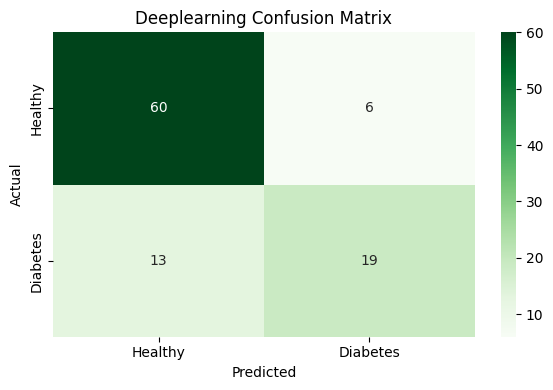

In [ ]:
#### minmax scaler로 정규화 한 데이터 딥러닝으로 학습시키기 ####

## 딥러닝 모델 세팅 (relu와 sigmoid 이용) ##
model_deeplearning = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

## early_stop 세팅 ##
early_stop = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', patience=10, factor=0.5)

model_deeplearning.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

## 모델 학습시키기(에포크 500) ##
model_deeplearning.fit(
    np.array(X_train_minmax), np.array(y_train),
    epochs=500,
    callbacks=[early_stop, reduce_lr]
)

## 모델로 예측하기 ##
y_pred_prob = model_deeplearning.predict(X_test_minmax)

y_pred_deeplearning = (y_pred_prob > 0.5).astype(int) #결과 값 올바른 형태로 전환

## 결과 출력 ##
print("정확도:", accuracy_score(y_test, y_pred_deeplearning))
print(classification_report(y_test, y_pred_deeplearning))

## 혼동 행렬 그려 시각화 하기 ##
conf_matrix_deeplearning = confusion_matrix(y_test, y_pred_deeplearning)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_deeplearning, annot=True, fmt="d", cmap="Greens",
            xticklabels=["Healthy", "Diabetes"],
            yticklabels=["Healthy", "Diabetes"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Deeplearning Confusion Matrix")
plt.tight_layout()
plt.show()

In [ ]:
## 세가지 방식 정확도 모두 출력하여 비교하기 ##
print("로지스틱 회기:", accuracy_score(y_test, y_pred_minmax))
print("의사결정 트리:", accuracy_score(y_test, y_pred_tree))
print("딥러닝:", accuracy_score(y_test, y_pred_deeplearning))

로지스틱 회기: 0.7653061224489796
의사결정 트리: 0.7551020408163265
딥러닝: 0.8061224489795918
